In [0]:
import numpy as np
from numpy.random import sample
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, validation_curve

In [2]:
# Mounts Google Drive, so files can be read and write there
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [18]:
# Reads abnormal and normal datasets
df_abnormal = pd.read_csv("/content/drive/My Drive/ML/projects/ecg/data/ptbdb_abnormal.csv", header=None)
df_normal = pd.read_csv("/content/drive/My Drive/ML/projects/ecg/data/ptbdb_normal.csv", header=None)

# Stacks df_abnormal and df_normal to create a single dataframe
df = pd.concat([df_abnormal, df_normal], axis=0)
print("\ndf class counts")
print( df.iloc[:,187].value_counts() )
print("df.shape => ", df.shape )


df class counts
1.0    10506
0.0     4046
Name: 187, dtype: int64
df.shape =>  (14552, 188)


In [19]:
X = df.iloc[:,0:-1]   # Extracts features from dataframe
y = df.iloc[:,-1]     # Extracts labels from dataframe

# Creates train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80, shuffle=True, random_state=1)

print("X_train.shape => ", X_train.shape )
print("y_train.shape => ", y_train.shape )
print("X_test.shape =>  ", X_test.shape )
print("y_test.shape =>  ", y_test.shape )

X_train.shape =>  (11641, 187)
y_train.shape =>  (11641,)
X_test.shape =>   (2911, 187)
y_test.shape =>   (2911,)


In [8]:
# Creates GBM model
model = GradientBoostingClassifier(n_estimators=160, learning_rate=0.1, max_depth=3, random_state=1, verbose=1)

model.fit(X_train, y_train)   # Trains the model

      Iter       Train Loss   Remaining Time 
         1           1.1217            1.25m
         2           1.0726            1.23m
         3           1.0301            1.21m
         4           0.9943            1.21m
         5           0.9609            1.20m
         6           0.9316            1.19m
         7           0.9070            1.18m
         8           0.8831            1.17m
         9           0.8597            1.16m
        10           0.8379            1.15m
        20           0.6906            1.08m
        30           0.5992           59.89s
        40           0.5437           55.61s
        50           0.4958           50.99s
        60           0.4565           46.51s
        70           0.4281           41.96s
        80           0.4019           37.37s
        90           0.3762           32.66s
       100           0.3548           28.01s


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=160,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=1,
                           warm_start=False)

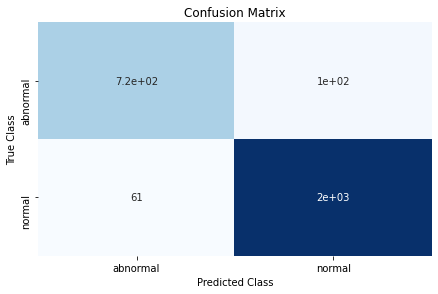


Classification Report
              precision    recall  f1-score   support

    abnormal       0.92      0.87      0.90       824
      normal       0.95      0.97      0.96      2087

    accuracy                           0.94      2911
   macro avg       0.94      0.92      0.93      2911
weighted avg       0.94      0.94      0.94      2911


Validation Accuracy =>  0.9433184472689797


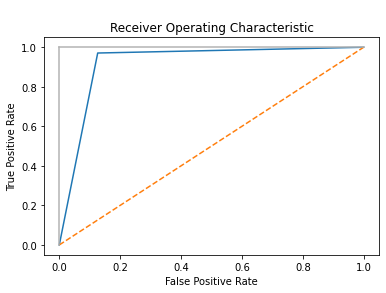

ROCAUC Score =>  0.922278925014305


In [16]:
# PLOTS CONFUSION MATRIX #######################################################
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Makes preditions for validation data, with the trained model
y_pred = model.predict(X_test)

ypredb = y_pred[:]
ytestb = y_test[:]

# Creates a heatmap
class_names = ['abnormal', 'normal']
cmdf = pd.DataFrame( confusion_matrix(ytestb,ypredb), index=class_names, 
                     columns=class_names)
sns.heatmap(cmdf, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()


# PLOTS CLASSIFICATION REPORT ##################################################
from sklearn.metrics import classification_report
print('\nClassification Report')
print( classification_report(ytestb,ypredb,target_names=['abnormal', 'normal']) )

print('\nValidation Accuracy => ', accuracy_score(ytestb,ypredb))


# PLOTS ROCAUC CURVE ###########################################################
from sklearn.metrics import roc_curve, roc_auc_score
ypred = y_pred[:]
ytest = y_test[:]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(ytest,ypred)

# Plot ROC curve
plt.title("\nReceiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

print('ROCAUC Score => ', roc_auc_score(ytest,ypred))